## Inventory for LOCA2 Regions

In [1]:
import numpy              as np
import cartopy.crs        as ccrs
import cartopy.feature    as cfeature
import matplotlib.patches as mpatches
import matplotlib.pyplot  as plt
import pandas             as pd
import shapely            as shapely
import os                 as os
import pyproj             as proj

import geopandas          as gp

from   siphon.catalog import TDSCatalog


import socket
print(socket.gethostname())

myhostname = socket.gethostname()

mandrenke.local


In [2]:
####################################################
####################################################
####################################################
#
# Mines Colors and Fonts
#

Mines_Blue = "#002554"


plt.rcParams.update({'text.color'      : Mines_Blue,
                     'axes.labelcolor' : Mines_Blue,
					 'axes.edgecolor'  : Mines_Blue,
					 'xtick.color'     : Mines_Blue,
					 'ytick.color'     : Mines_Blue,
                     'font.family'     : "Open Sans"})


#
####################################################
####################################################
####################################################

In [3]:
####################################################
#
# Kyrill vs Mandrenke
#

if ("mandrenke" in socket.gethostname()):
    # Mandrenke
    target_dir  = "/Users/wjc/GitHub/LOCA_Percentile_Processing/"
    display_img = True

else:
    # Kyrill
    target_dir = "/var/www/html/wjc/eduresources/"
    display_img = False

print(target_dir)

#
####################################################

/Users/wjc/GitHub/LOCA_Percentile_Processing/


In [4]:
dir_hucs = "http://kyrill.ias.sdsmt.edu:8080/thredds/catalog/LOCA2/Specific_Regional_Aggregate_Sets/USGS_HUC08_Basins/R_Annual_Files/catalog.xml"
dir_cdiv = "http://kyrill.ias.sdsmt.edu:8080/thredds/catalog/LOCA2/Specific_Regional_Aggregate_Sets/NCEI_Climate_Divisions/R_Annual_Files/catalog.xml"

dir_hucs_csv = "http://kyrill.ias.sdsmt.edu/wjc/eduresources/USGS_HUC08_LUT.csv"
dir_cdiv_csv = "http://kyrill.ias.sdsmt.edu/wjc/eduresources/NCEI_nClimDiv_LUT.csv"

pre_hucs = "LOCA2_V1_HUC08_ANNUAL_"
pre_cdiv = "LOCA2_V1_nCLIMDIV_ANNUAL_"

cat_hucs = TDSCatalog(dir_hucs).datasets
cat_cdiv = TDSCatalog(dir_cdiv).datasets

available_hucs = []
for file_huc in cat_hucs:
    available_hucs.append(file_huc.replace(pre_hucs, "").replace(".RData", ""))
    
available_cdiv = []
for file_cdiv in cat_cdiv:
    available_cdiv.append(file_cdiv.replace(pre_cdiv, "").replace(".RData", ""))

table_hucs = pd.read_csv(filepath_or_buffer = dir_hucs_csv)
table_cdiv = pd.read_csv(filepath_or_buffer = dir_cdiv_csv)

available_hucs = np.array(available_hucs, dtype=np.int32)
available_cdiv = np.array(available_cdiv, dtype=np.int32)



In [5]:
table_huc = table_hucs[table_hucs["huc08"].isin(available_hucs)]


table_huc = table_huc[['huc08',
                         'huc08_name', 
                         'huc06_name', 
                         'huc04_name', 
                         'huc02_name']].rename(columns = {"huc08"     : "HUC-08",
                                                          "huc08_name": "BASIN NAME",
                                                          "huc06_name": "HUC-06 BASIN",
                                                          "huc04_name": "HUC-04 BASIN",
                                                          "huc02_name": "HUC-02 REGION"})

table_huc["HUC-08"] = [str(x).zfill(8)   for x in table_huc["HUC-08"].values]
table_huc = table_huc.sort_values("HUC-08")
table_huc.to_csv(path_or_buf = target_dir + "HUC_table_avail.csv", index=False)
print(target_dir + "HUC_table_avail.csv")


if (display_img) :
    display(table_huc)

/Users/wjc/GitHub/LOCA_Percentile_Processing/HUC_table_avail.csv


,HUC-08,BASIN NAME,HUC-06 BASIN,HUC-04 BASIN,HUC-02 REGION
382,04300101,Mettawee River,Lake Champlain-Richelieu River,Middle Saint Lawrence River,Great Lakes Region
383,04300102,Otter Creek,Lake Champlain-Richelieu River,Middle Saint Lawrence River,Great Lakes Region
384,04300103,Winooski River,Lake Champlain-Richelieu River,Middle Saint Lawrence River,Great Lakes Region
385,04300104,Ausable River,Lake Champlain-Richelieu River,Middle Saint Lawrence River,Great Lakes Region
386,04300105,Lamoille River,Lake Champlain-Richelieu River,Middle Saint Lawrence River,Great Lakes Region
...,...,...,...,...,...
1382,11030017,Upper Walnut River,Middle Arkansas,Middle Arkansas,Arkansas-White-Red Region
1383,11030018,Lower Walnut River,Middle Arkansas,Middle Arkansas,Arkansas-White-Red Region
1410,11050002,Lower Cimarron-Skeleton,Lower Cimarron,Lower Cimarron,Arkansas-White-Red Region
1331,11050003,Lower Cimarron,Lower Cimarron,Lower Cimarron,Arkansas-White-Red Region


In [6]:
table_div = table_cdiv[table_cdiv["climdiv"].isin(available_cdiv)][["climdiv",
                                                                   "climdiv_name",
                                                                   "climdiv_state_name"]]

table_div["climdiv"] = [str(x).zfill(4) for x in table_div["climdiv"].values]
table_div  = table_div.rename(columns = {"climdiv":"DIVISION",
                           "climdiv_name":"NAME",
                           "climdiv_state_name":"STATE"}).sort_values("DIVISION")

table_div.to_csv(path_or_buf = target_dir + "ClimDiv_table_avail.csv", index=False)
print(target_dir + "ClimDiv_table_avail.csv")

if (display_img) :
    display(table_div)


/Users/wjc/GitHub/LOCA_Percentile_Processing/ClimDiv_table_avail.csv


,DIVISION,NAME,STATE
8,0201,Northwest,Arizona
9,0202,Northeast,Arizona
10,0203,North Central,Arizona
11,0204,East Central,Arizona
12,0205,Southwest,Arizona
...,...,...,...
339,4806,Belle Fourche Drainage,Wyoming
340,4807,Cheyenne & Niobrara Drainage,Wyoming
341,4808,Lower Platte,Wyoming
342,4809,Wind River,Wyoming


In [7]:
shp_hucs = gp.read_file("GeoJSON_Files/CONUS_USGS_HUC-08.geojson")
shp_cdiv = gp.read_file("GeoJSON_Files/CONUS_NCEI_Climate_Divisions.geojson")

In [8]:
print("  HUC08:RAW:",len(shp_hucs), len(shp_hucs.get_coordinates()))
print("CLIMDIV:RAW:",len(shp_cdiv), len(shp_cdiv.get_coordinates()))

  HUC08:RAW: 2193 26538431
CLIMDIV:RAW: 344 3169875


In [9]:
shp_cdiv = shp_cdiv[shp_cdiv["CLIMDIV"].isin(available_cdiv)]
shp_hucs = shp_hucs[shp_hucs[  "huc8" ].isin(available_hucs)]



if (display_img) :
    display(shp_cdiv)


,CLIMDIV,geometry
8,201,"POLYGON ((-114.75589 36.08584, -114.75562 36.0..."
9,202,"POLYGON ((-110.50069 37.00426, -110.49091 37.0..."
10,203,"POLYGON ((-113.33416 35.52804, -113.32957 35.5..."
11,204,"POLYGON ((-111.71950 34.16402, -111.71920 34.1..."
12,205,"POLYGON ((-113.33635 34.31719, -113.33582 34.3..."
...,...,...
339,4806,"POLYGON ((-104.19334 44.99802, -104.17200 44.9..."
340,4807,"POLYGON ((-104.28338 44.15419, -104.27634 44.1..."
341,4808,"POLYGON ((-106.52965 43.18177, -106.52644 43.1..."
342,4809,"POLYGON ((-109.51581 43.93993, -109.50484 43.9..."


In [10]:
shp_cdiv = shp_cdiv.assign(CLIMDIV=1) 
shp_hucs = shp_hucs.assign(   huc8=1) 
print("  HUC08:CUT:",len(shp_hucs), len(shp_hucs.get_coordinates()))
print("CLIMDIV:CUT:",len(shp_cdiv), len(shp_cdiv.get_coordinates()))

  HUC08:CUT: 216 2415527
CLIMDIV:CUT: 201 1249670


In [11]:
shp_cdivD = shp_cdiv.dissolve(by = "CLIMDIV")
shp_hucsD = shp_hucs.dissolve(by =    "huc8")

In [12]:
print("  HUC08:DIS:",len(shp_hucsD), len(shp_hucs.get_coordinates()))
print("CLIMDIV:DIS:",len(shp_cdivD), len(shp_cdiv.get_coordinates()))

  HUC08:DIS: 1 2415527
CLIMDIV:DIS: 1 1249670


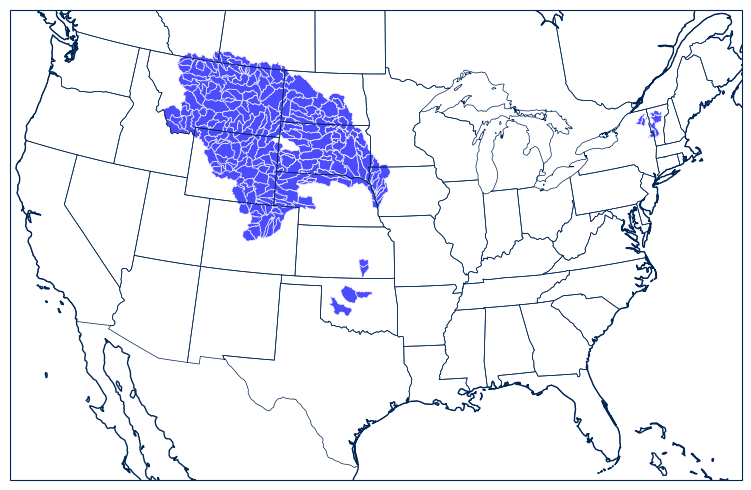

In [13]:
ccrs_proj = ccrs.AlbersEqualArea(central_longitude  =   -96, 
                                 central_latitude   =  37.5, 
                                 false_easting      =   0.0, 
                                 false_northing     =   0.0, 
                                 standard_parallels = (29.5, 45.5))

fig = plt.figure(figsize=[9,5], facecolor="white")
ax  = fig.add_subplot(1, 1, 1, 
                      projection = ccrs_proj)

#fig.suptitle("CMIP6 LOCA-2 Available Regions", color = Mines_Blue, fontsize= 'xx-large')
#ax.set_title("USGS HUC-08 Basins", color = Mines_Blue, fontsize= 'x-large')
ax.set_extent([-119, -73, 22.5, 51])

ax.add_feature(cfeature.COASTLINE, edgecolor = Mines_Blue)
ax.add_feature(cfeature.LAKES,     facecolor = 'None')
#ax.add_feature(cfeature.RIVERS,    edgecolor = Mines_Blue)
ax.add_feature(cfeature.STATES,    edgecolor = Mines_Blue, linewidth=0.5)


#ax.set_frame_on(False)



shp_hucs.plot(ax        = ax,
              aspect    = 'equal',
              facecolor = "Blue",
              edgecolor = 'white', 
              alpha     = 0.7,
              transform = ccrs.PlateCarree(),
              linewidth = .5)
plt.tight_layout()
plt.savefig("./LOCA2_HUCs_Available_Regions_Map.png")
if (display_img) :
    plt.show()

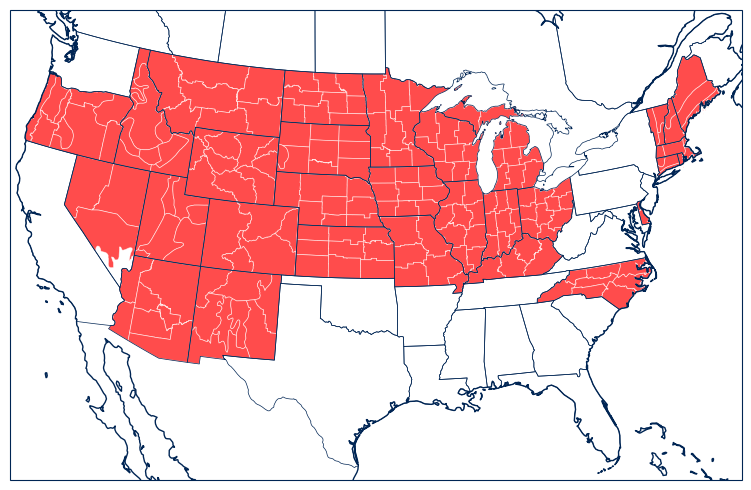

In [14]:
ccrs_proj = ccrs.AlbersEqualArea(central_longitude  =   -96, 
                                 central_latitude   =  37.5, 
                                 false_easting      =   0.0, 
                                 false_northing     =   0.0, 
                                 standard_parallels = (29.5, 45.5))

fig = plt.figure(figsize=[9,5], facecolor="white")
ax  = fig.add_subplot(1, 1, 1, 
                      projection = ccrs_proj)

#fig.suptitle("CMIP6 LOCA-2 Available Regions", color = Mines_Blue, fontsize= 'xx-large')
#ax.set_title("NCEI State Climate Divisions", color = Mines_Blue, fontsize= 'x-large')
ax.set_extent([-119, -73, 22.5, 51])

ax.add_feature(cfeature.COASTLINE, edgecolor = Mines_Blue)
ax.add_feature(cfeature.LAKES,     facecolor = 'None')
#ax.add_feature(cfeature.RIVERS,    edgecolor = Mines_Blue)
ax.add_feature(cfeature.STATES,    edgecolor = Mines_Blue, linewidth=0.5)


#ax.set_frame_on(False)


shp_cdiv.plot(ax        = ax,
              aspect    = 'equal',
              facecolor = "red",
              edgecolor = 'white', 
              alpha     = 0.7,
              transform = ccrs.PlateCarree(),
              linewidth = .5)

plt.tight_layout()
#plt.savefig("./LOCA2_ClimDiv_Available_Regions_Map.svg")
plt.savefig("./LOCA2_ClimDiv_Available_Regions_Map.png")
if (display_img) :
    plt.show()

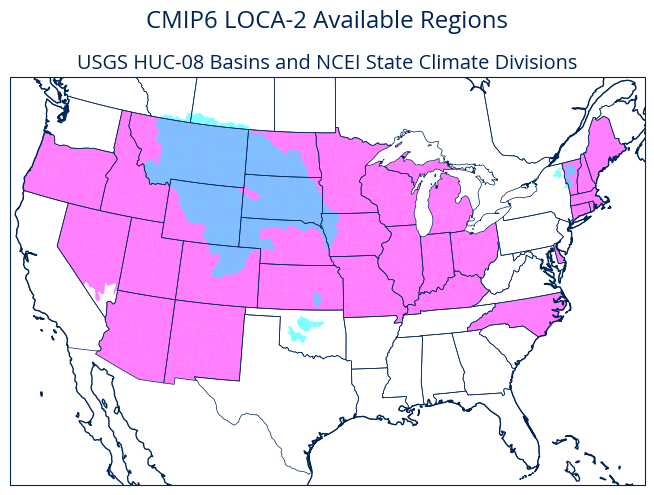

In [15]:
ccrs_proj = ccrs.AlbersEqualArea(central_longitude  =   -96, 
                                 central_latitude   =  37.5, 
                                 false_easting      =   0.0, 
                                 false_northing     =   0.0, 
                                 standard_parallels = (29.5, 45.5))

fig = plt.figure(figsize=[9,5], facecolor="white")
ax  = fig.add_subplot(1, 1, 1, 
                      projection = ccrs_proj)

#fig.suptitle("CMIP6 LOCA-2 Available Regions", color = Mines_Blue, fontsize= 'xx-large')
#ax.set_title("NCEI State Climate Divisions", color = Mines_Blue, fontsize= 'x-large')
ax.set_extent([-119, -73, 22.5, 51])

ax.add_feature(cfeature.COASTLINE, edgecolor = Mines_Blue)
ax.add_feature(cfeature.LAKES,     facecolor = 'None')
#ax.add_feature(cfeature.RIVERS,    edgecolor = Mines_Blue)
ax.add_feature(cfeature.STATES,    edgecolor = Mines_Blue, linewidth=0.5)


#ax.set_frame_on(False)


shp_cdiv.plot(ax        = ax,
              aspect    = 'equal',
              facecolor = "magenta",
              edgecolor = 'None', 
              alpha     = 0.5,
              transform = ccrs.PlateCarree(),
              linewidth = 0)

shp_hucs.plot(ax        = ax,
              aspect    = 'equal',
              facecolor = "cyan",
              edgecolor = 'None', 
              alpha     = 0.5,
              transform = ccrs.PlateCarree(),
              linewidth = 0)
plt.tight_layout()
plt.savefig("./LOCA2_Available_Regions_Map.png")
if (display_img) :
    plt.show()